<a href="https://colab.research.google.com/github/saheedniyi02/Saheed-articles-codes/blob/main/Imbalanced/Landslide_Prevention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from zipfile import ZipFile
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

#unzipping folder

In [3]:
with ZipFile("/content/drive/MyDrive/Landslide/landslide-prevention-and-innovation-challenge.zip", 'r') as zip:
    zip.extractall()

In [4]:
train=pd.read_csv("Train.csv",index_col=0)
test=pd.read_csv("Test.csv",index_col=0)

In [5]:
target=train["Label"]
train.drop("Label",axis=1,inplace=True)

In [26]:
print(train.shape)

(10864, 225)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


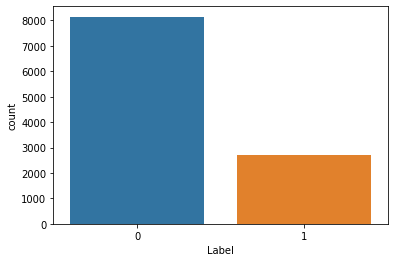

In [6]:
sns.countplot(target)

In [7]:
X,val,y,y_val=train_test_split(train,target,test_size=0.2,random_state=0)

## **Without tuning probability threshold**

In [8]:
model=RandomForestClassifier(verbose=2,random_state=0,n_estimators=1000)

In [9]:
model.fit(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  1.8min finished


RandomForestClassifier(n_estimators=1000, random_state=0, verbose=2)

In [10]:
print(f"Your validation f1_score is {f1_score(model.predict(val),y_val)}")
print(f"Your train f1_score is {f1_score(model.predict(X),y)}")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Your validation f1_score is 0.6466165413533835
Your train f1_score is 1.0


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.4s finished


In [11]:
sub=pd.DataFrame({"Sample_ID":test.index,"Label":model.predict(test)}).set_index("Sample_ID")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.8s finished


In [12]:
sub.to_csv("sub_landslide.csv")

# ****Tuning probability threshold****

In [13]:
model=RandomForestClassifier(verbose=2,random_state=0,n_estimators=1000)

In [14]:
model.fit(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  1.8min finished


RandomForestClassifier(n_estimators=1000, random_state=0, verbose=2)

In [15]:
y_predicted_proba=pd.Series(model.predict_proba(val)[:,1])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.7s finished


In [16]:
def tune_treshold(proba,threshold):
  if proba>threshold:
    return 1
  else:
    return 0

In [17]:
threshold_range=np.arange(0,1,0.01)
f1_scores=[]
for i in threshold_range:
  tuned_predictions=y_predicted_proba.apply(tune_treshold,args=(i,))
  f1_scores.append(f1_score(tuned_predictions,y_val))

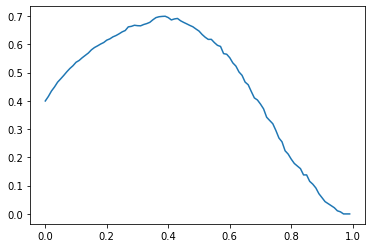

In [18]:
plt.plot(threshold_range,f1_scores)

In [19]:
threshold_range=np.arange(0.35,0.4,0.0001)
f1_scores=[]
for i in threshold_range:
  tuned_predictions=y_predicted_proba.apply(tune_treshold,args=(i,))
  f1_scores.append(f1_score(tuned_predictions,y_val))

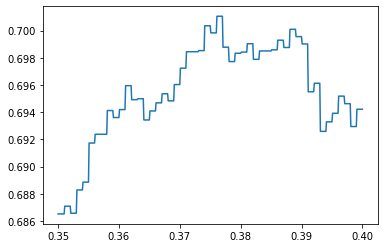

In [20]:
plt.plot(threshold_range,f1_scores)

In [21]:
best_treshold=0.375

In [22]:
print(f"Your validation f1_score is {f1_score(y_predicted_proba.apply(tune_treshold,args=(best_treshold,)),y_val)}")

Your validation f1_score is 0.699825479930192


In [23]:
sub=pd.DataFrame({"Sample_ID":test.index,"Label":model.predict_proba(test)[:,1]}).set_index("Sample_ID")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.7s finished


In [24]:
sub["Label"]=sub["Label"].apply(tune_treshold,args=(best_treshold,))

In [25]:
sub.to_csv("sub_landslide.csv")